# IMPORTING REQUIRED LIBRARIES

In [1]:
# EDA Lbraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Models from sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Model Evaluation Metrics
from sklearn.metrics import r2_score,explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# LOADING THE DATA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/regression-python/master/Salaries%20based%20on%20Positions%20-%20dataset/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

# EDA (Exploratory Data Analysis)

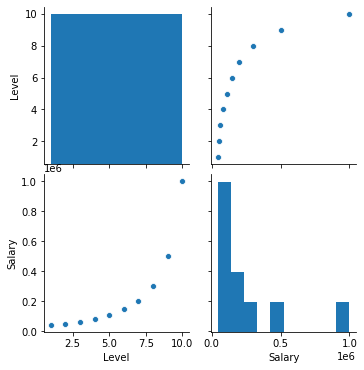

In [5]:
sns.pairplot(df)

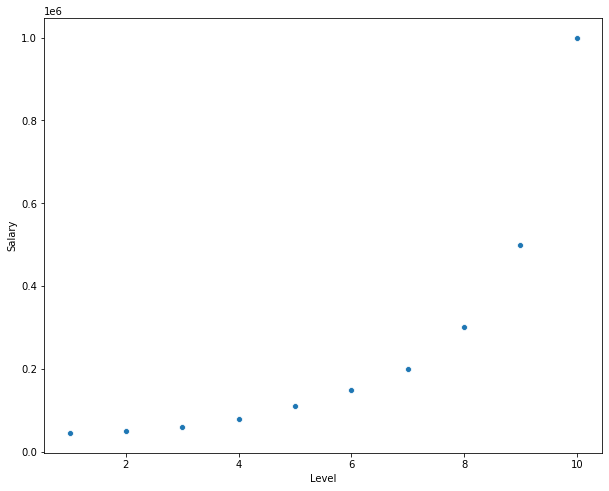

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Level', y='Salary', data=df);

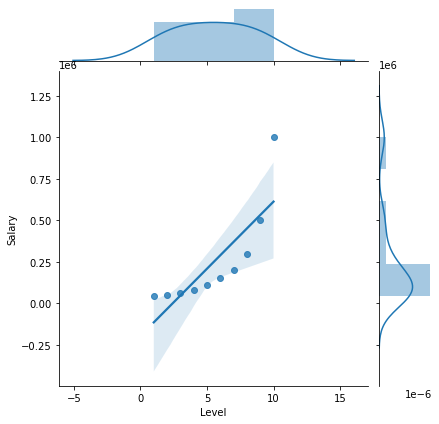

In [7]:
sns.jointplot(x='Level', y='Salary', data=df, kind="reg");

In [8]:
# Correlation between Attributes
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


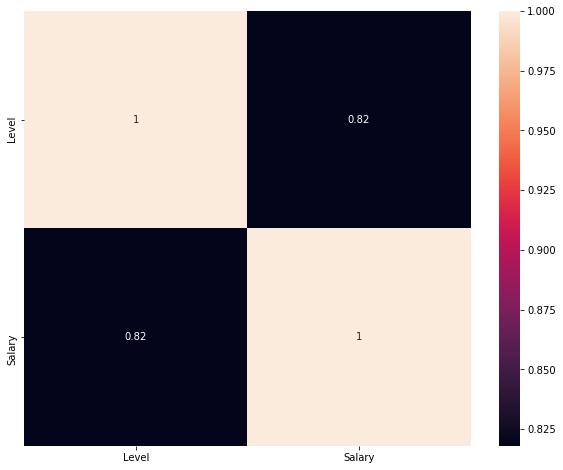

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

# SELECTING THE DATA AND SPLITTING INTO TRAIN AND TEST

In [10]:
# Selecting Attributes
X = df[['Level']]

# Selecting Target 
y = df['Salary']

In [11]:
X.shape, y.shape

((10, 1), (10,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

# MODEL BUILDING

## LINEAR REGRESSION

In [13]:
# Create the object
model = LinearRegression()

# Fit the training data
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Checking the R2 score of the model

print(f'The R squared value is : {model.score(X_test, y_test):.2f}')

The R squared value is : 0.85


In [15]:
# Creating Predictions
y_pred = model.predict(X_test)

In [16]:
print(f'R squared value : {r2_score(y_test, y_pred):.2f}')

R squared value : 0.85


In [17]:
# Adjusted R-squared
1 - (1-model.score(X_test, y_test))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8257765020147972

In [18]:
print(f'Explained Variance Score: {explained_variance_score(y_test, y_pred):.2f}')

Explained Variance Score: 0.87


In [19]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 7840057409.334121


In [20]:
np.mean(cross_val_score(model, X, y, scoring='neg_mean_squared_error'))

-86661778604.29477

In [21]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error: 82607.75862068962


In [22]:
np.mean(cross_val_score(model, X, y, scoring='neg_mean_absolute_error'))

-233318.45238095237

# CHECKING THE DISTRIBUTION OF RESIDUALS

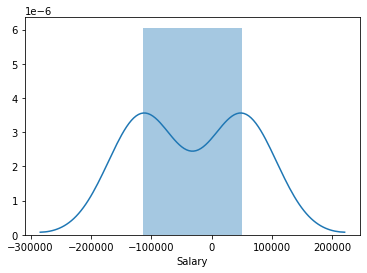

In [23]:
sns.distplot((y_pred-y_test));

# POLYNOMIAL REGRESSION

## MODEL 1: DEGREE 2

In [24]:
poly_d2 = PolynomialFeatures(degree=2)

In [25]:
X_train_poly = poly_d2.fit_transform(X_train)
poly_reg_d2 = LinearRegression()
poly_reg_d2.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
# Visualizing the Polymonial Regression
def plot_my_poly(model, X,y, poly):
    plt.scatter(X, y, color='red')
    plt.plot(X, model.predict(poly.fit_transform(X)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('Level')
    plt.ylabel('Salary')
    plt.show()
    return 

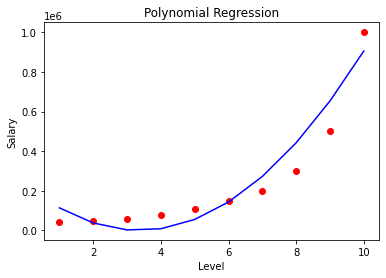

In [27]:
plot_my_poly(poly_reg_d2, X=X, y=y, poly=poly_d2)

In [28]:
# Creating Predictions
y_pred_d2 = poly_reg_d2.predict(poly_d2.transform(X_test))

In [29]:
result_d2 = pd.DataFrame()
result_d2['Predicted Salaries']= np.array(y_pred_d2)
result_d2['Actual Salaries']=np.array(y_test)
result_d2

,Predicted Salaries,Actual Salaries
0,653243.004522,500000
1,38027.487281,50000


# MODEL 2: DEGREE 3

In [30]:
poly_d3 = PolynomialFeatures(degree=3)

In [31]:
X_train_poly = poly_d3.fit_transform(X_train)
poly_reg_d3 = LinearRegression()
poly_reg_d3.fit(X_train_poly, y_train)

LinearRegression()

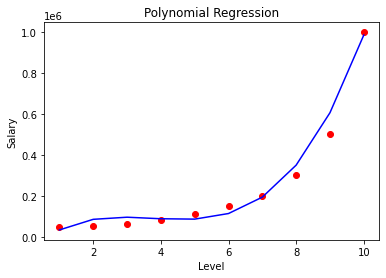

In [32]:
plot_my_poly(poly_reg_d3, X=X, y=y, poly=poly_d3)

In [33]:
# Creating Predictions
y_pred_d3 = poly_reg_d3.predict(poly_d3.transform(X_test))

In [34]:
result_d3 = pd.DataFrame()
result_d3['Predicted Salaries']= np.array(y_pred_d3)
result_d3['Actual Salaries']=np.array(y_test)
result_d3

,Predicted Salaries,Actual Salaries
0,606335.600512,500000
1,84934.891292,50000


# MODEL 3: DEGREE 4

In [35]:
poly_d4 = PolynomialFeatures(degree=4)

In [36]:
X_train_poly = poly_d4.fit_transform(X_train)
poly_reg_d4 = LinearRegression()
poly_reg_d4.fit(X_train_poly, y_train)

LinearRegression()

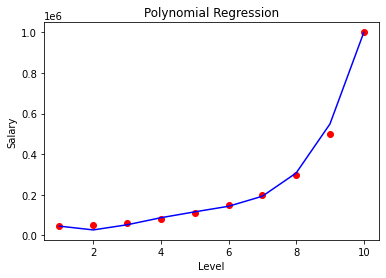

In [37]:
plot_my_poly(poly_reg_d4, X=X, y=y, poly=poly_d4)

In [38]:
# Creating Predictions
y_pred_d4 = poly_reg_d4.predict(poly_d4.transform(X_test))

In [39]:
result_d4 = pd.DataFrame()
result_d4['Predicted Salaries']= np.array(y_pred_d4)
result_d4['Actual Salaries']=np.array(y_test)
result_d4

,Predicted Salaries,Actual Salaries
0,548738.145308,500000
1,27337.436088,50000


# MODEL 4: DEGREE 5

In [40]:
poly_d5 = PolynomialFeatures(degree=5)

In [41]:
X_train_poly = poly_d5.fit_transform(X_train)
poly_reg_d5 = LinearRegression()
poly_reg_d5.fit(X_train_poly, y_train)

LinearRegression()

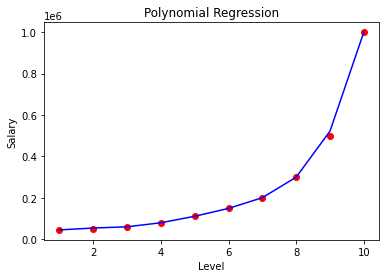

In [42]:
plot_my_poly(poly_reg_d5, X=X, y=y, poly=poly_d5)

In [43]:
# Creating Predictions
y_pred_d5 = poly_reg_d5.predict(poly_d5.transform(X_test))

In [44]:
result_d5 = pd.DataFrame()
result_d5['Predicted Salaries']= np.array(y_pred_d5)
result_d5['Actual Salaries']=np.array(y_test)
result_d5

,Predicted Salaries,Actual Salaries
0,522021.224432,500000
1,54054.356963,50000


# MODEL 5: DEGREE 6

In [45]:
poly_d6 = PolynomialFeatures(degree=6)

In [46]:
X_train_poly = poly_d6.fit_transform(X_train)
poly_reg_d6 = LinearRegression()
poly_reg_d6.fit(X_train_poly, y_train)

LinearRegression()

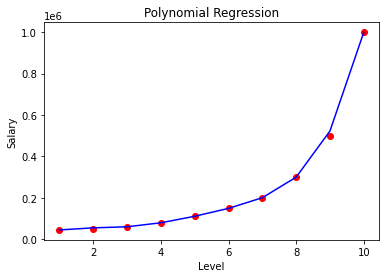

In [47]:
plot_my_poly(poly_reg_d6, X=X, y=y, poly=poly_d6)

In [48]:
# Creating Predictions
y_pred_d6 = poly_reg_d6.predict(poly_d6.transform(X_test))

In [49]:
result_d6 = pd.DataFrame()
result_d6['Predicted Salaries']= np.array(y_pred_d6)
result_d6['Actual Salaries']=np.array(y_test)
result_d6

,Predicted Salaries,Actual Salaries
0,522912.005162,500000
1,54945.137695,50000


# TESTING MODELS ALL AT ONCE

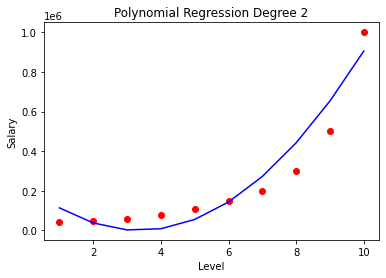

 Results of Polynomial Regression Degree 2:  


,Predicted Salaries,Actual Salaries
0,653243.004522,500000
1,38027.487281,50000


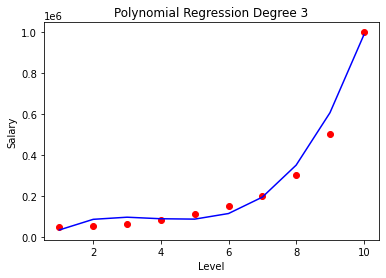

 Results of Polynomial Regression Degree 3:  


,Predicted Salaries,Actual Salaries
0,606335.600512,500000
1,84934.891292,50000


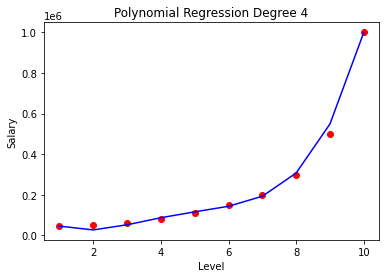

 Results of Polynomial Regression Degree 4:  


,Predicted Salaries,Actual Salaries
0,548738.145308,500000
1,27337.436088,50000


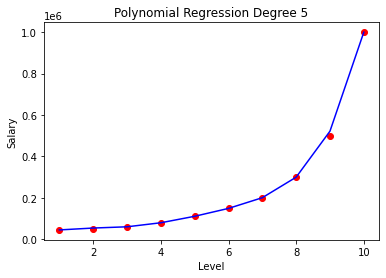

 Results of Polynomial Regression Degree 5:  


,Predicted Salaries,Actual Salaries
0,522021.224432,500000
1,54054.356963,50000


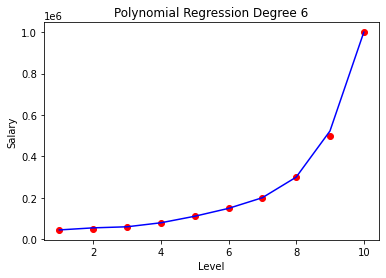

 Results of Polynomial Regression Degree 6:  


,Predicted Salaries,Actual Salaries
0,522912.005162,500000
1,54945.137695,50000


In [50]:
for i in range(2,7):
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    plt.scatter(X, y, color='red')
    plt.plot(X, poly_reg.predict(poly.fit_transform(X)), color='blue')
    plt.title(f'Polynomial Regression Degree {i}')
    plt.xlabel('Level')
    plt.ylabel('Salary')
    plt.show()
    y_pred= poly_reg.predict(poly.transform(X_test))
    result= pd.DataFrame()
    result['Predicted Salaries']= np.array(y_pred)
    result['Actual Salaries']=np.array(y_test)
    print(f'\033[1m Results of Polynomial Regression Degree {i}:  \033[0m')
    #print('\n')
    #print(result.to_markdown())
    display(HTML(result.to_html()))
    print('\n')

# So we can say that Degree 5 model is the best 